In [104]:
import pandas as pd
import numpy as np
import random
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [105]:
dataset = pd.read_csv('final.csv')
dataset

,Unnamed: 0,Name,gender,Age,StudentID,ethnicity,parental education,lunch,test preparation course,math score,reading score,writing score
0,0,Mark Dodd,female,28,10000,group B,bachelor's degree,standard,none,72,72,74
1,1,Tony Meola,female,26,10001,group C,some college,standard,completed,69,90,88
2,2,Mark Dougherty,female,25,10002,group B,master's degree,standard,none,90,95,93
3,3,Jorge Campos,male,20,10003,group A,associate's degree,free/reduced,none,47,57,44
4,4,Garth Lagerwey,male,25,10004,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Luis Robles,female,28,10995,group E,master's degree,standard,completed,88,99,95
996,996,Zack Steffen,male,20,10996,group C,high school,free/reduced,none,62,55,55
997,997,Bobby Shuttleworth,female,19,10997,group C,high school,free/reduced,completed,59,71,65
998,998,Stefan Frei,female,22,10998,group D,some college,standard,completed,68,78,77


EXERCISE 2.1 - Study the sensitivity of the analysis implemented during the preparation phase.

In [106]:
def avgSensitivity(attribute):
    genAvg = np.average(attribute)
    dataArr = np.array(attribute)
    
    avgs = []
    for i in range(len(dataArr)):
        newAvg = np.average(np.delete(dataArr,i))
        avgs.append(newAvg)
    
    firstFlag = 0
    for avg in avgs:
        if firstFlag == 0:
            maxDiff = abs(genAvg - avg)
            firstFlag = 1
        else:
            maxi = abs(genAvg - avg)
            if maxi > maxDiff:
                maxDiff = maxi
    return maxDiff

In [107]:
def stdSensitivity(attribute):
    genAvg = np.std(attribute)
    dataArr = np.array(attribute)
    
    stds = []
    for i in range(len(dataArr)):   
        newStd = np.std(np.delete(dataArr,i))
        stds.append(newStd)
    
    firstFlag = 0
    for avg in stds:
        if firstFlag == 0:
            maxDiff = abs(genAvg - avg)
            firstFlag = 1
        else:
            maxi = abs(genAvg - avg)
            if maxi > maxDiff:
                maxDiff = maxi
    return maxDiff

In [108]:
maxDiffMathScoreAvg = avgSensitivity(dataset["math score"])
maxDiffMathScoreStd = stdSensitivity(dataset["math score"])

maxDiffReadScoreAvg = avgSensitivity(dataset["reading score"])
maxDiffReadScoreStd = stdSensitivity(dataset["reading score"])

maxDiffWriteScoreAvg = avgSensitivity(dataset["writing score"])
maxDiffWriteScoreStd = stdSensitivity(dataset["writing score"])

originalDiff = [maxDiffMathScoreAvg,maxDiffMathScoreStd,
                maxDiffReadScoreAvg,maxDiffReadScoreStd,
                maxDiffWriteScoreAvg, maxDiffWriteScoreStd]

sensitivityData = pd.DataFrame(index = ["original","0.01","0.2","ln(2)","ln(3)"],
                                columns = ["math score avg","math score std", "reading score avg","reading score std","writing score avg","writing score std"])

sensitivityData.loc["original"] = originalDiff

sensitivityData

,math score avg,math score std,reading score avg,reading score std,writing score avg,writing score std
original,0.066155,0.137424,0.052221,0.08639,0.058112,0.103927
0.01,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN
ln(2),NaN,NaN,NaN,NaN,NaN,NaN
ln(3),NaN,NaN,NaN,NaN,NaN,NaN


EXERCISE 2.2 - Implement a differential privacy mechanism to add to the analyses.

In [109]:
def diffPriv(dataset,columnName,querySensitivity,epsilon):
    col = np.array(dataset[columnName])
    dataset.drop(columns=[columnName])
    laplaceVal = np.random.laplace(0,querySensitivity/epsilon,len(col))
    for i in range(len(col)):
        col[i] += laplaceVal[i]
    dataset[columnName] = col

Exercise 2.3 - Execute the analysis with the implemented differential privacy.

In [111]:
epsilons = {'0.01':0.01,'0.2':0.2,'ln(2)': np.log(2),'ln(3)': np.log(3)}
attributes = ['math score','reading score','writing score']

for attr in attributes:
    for key,value in epsilons.items():
        attributeDataAvg = dataset.copy()
        attributeDataStd = dataset.copy()

        diffPriv(attributeDataAvg,attr,sensitivityData.loc["original"][attr + ' avg'],value)
        diffPriv(attributeDataStd,attr,sensitivityData.loc["original"][attr + ' std'],value)

        newSensivityAvg = avgSensitivity(attributeDataAvg[attr])
        newSensivityStd = stdSensitivity(attributeDataStd[attr])
        sensitivityData.loc[key][attr +' avg'] = newSensivityAvg
        sensitivityData.loc[key][attr +' std'] = newSensivityStd

sensitivityData


,math score avg,math score std,reading score avg,reading score std,writing score avg,writing score std
original,0.066155,0.137424,0.052221,0.08639,0.058112,0.103927
0.01,0.064302,0.189695,0.052082,0.136842,0.067583,0.164749
0.2,0.065673,0.139051,0.051711,0.091989,0.057618,0.105361
ln(2),0.065673,0.135112,0.051719,0.084713,0.058614,0.101944
ln(3),0.065643,0.135371,0.052723,0.088183,0.057598,0.101941


EXERCISE 2.4 - Analyze the results and compare with the results obtained in the other phases.

In [112]:
def plotSensAnalysis(x,title, avg,std):
    plt.figure(figsize=(12, 7))

    plt.grid(True)
    plt.title("Sensitivity of " + title, fontsize='x-large')
    plt.ylabel("Sensitivity", fontsize='x-large')
    plt.xlabel("Epsilon value", fontsize='x-large')
    
    plt.scatter(x, avg, color='blue')
    plt.scatter(x, std, color='red')
    
    plt.plot(x, avg, label="Evolution of avg (original, 0.01, 0.2, ln(2), ln(3))", color='blue')
    plt.plot(x, std, label="Evolution of std (original, 0.01, 0.2, ln(2), ln(3))", color='red')
    
    plt.legend()
    
    plt.show()

Pelo o que se observa nos gráficos, quando o epsilon toma valores baixos os valores de avg(average) e std(standard deviation), retornados pela respetiva função de cálculo de sensibilidade, aumentam. No entanto a variaçáo dos valores de avg nos gráficos dos resultados do teste de Matemática e dos resultados do teste de ler é irrisória.

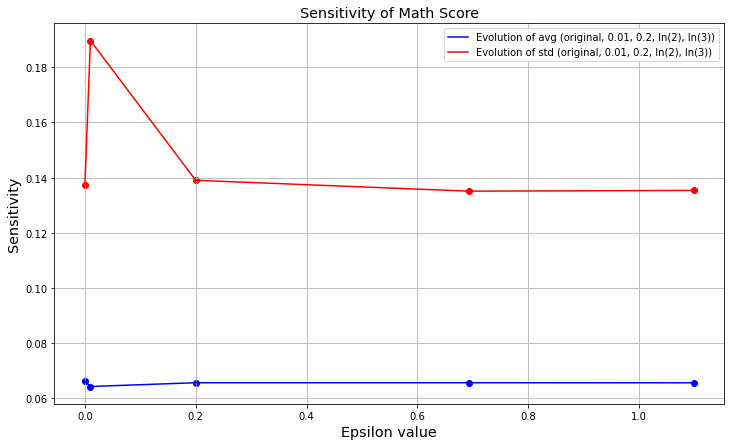

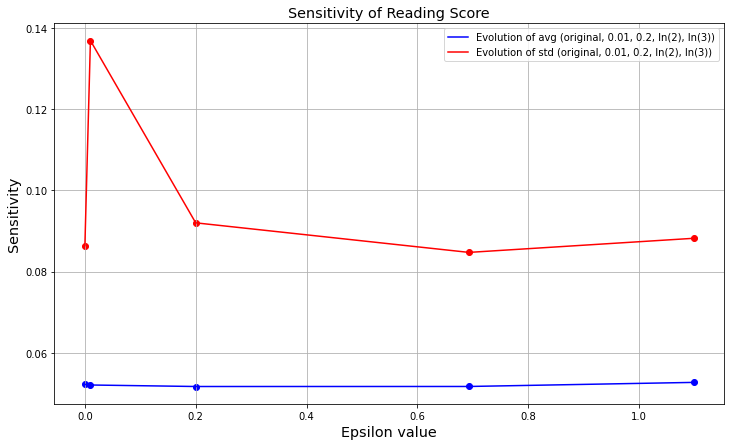

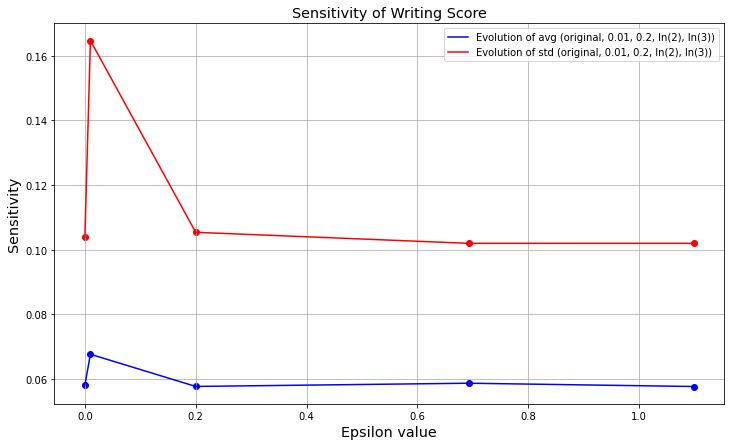

In [113]:
x = [0,0.01,0.2,np.log(2),np.log(3)]
plotSensAnalysis(x,"Math Score",sensitivityData['math score avg'],sensitivityData['math score std'])
plotSensAnalysis(x,"Reading Score",sensitivityData['reading score avg'],sensitivityData['reading score std'])
plotSensAnalysis(x,"Writing Score",sensitivityData['writing score avg'],sensitivityData['writing score std'])

In [114]:
def plotGroupAnalysis(title,xLabel,yLabel,x,plotDatas):
    plt.figure()
    plt.subplots(2, 2, figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.grid(True)
    plt.title(title)
    plt.ylabel(yLabel)
    plt.plot(x, plotDatas['original'], color='red')
    plt.scatter(x, plotDatas['original'], color='red', label="Original values")
    plt.plot(x, plotDatas['0.01'], color='green')
    plt.scatter(x,plotDatas['0.01'], label="Epsilon 0.01", color='green')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.grid(True)
    plt.title("Comparison between mean values of income per year grouped by age")
    plt.plot(x, plotDatas['original'], color='red')
    plt.scatter(x, plotDatas['original'], color='red', label="Original values")
    plt.plot(x, plotDatas['0.2'], color='yellow')
    plt.scatter(x, plotDatas['0.2'], label="Epsilon 0.2", color='yellow')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.grid(True)
    plt.ylabel(yLabel)
    plt.xlabel(xLabel)
    plt.plot(x, plotDatas['original'], color='red')
    plt.scatter(x, plotDatas['original'], color='red', label="Original values")
    plt.plot(x, plotDatas['ln(2)'], color='blue')
    plt.scatter(x, plotDatas['ln(2)'], label="Epsilon ln(2)", color='blue')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.grid(True)
    plt.xlabel(xLabel)
    plt.plot(x, plotDatas['original'], color='red')
    plt.scatter(x, plotDatas['original'], color='red', label="Original values")
    plt.plot(x, plotDatas['ln(3)'], color='orange')
    plt.scatter(x,  plotDatas['ln(3)'], label="Epsilon ln(3)", color='orange')
    plt.legend()
    plt.show()

In [115]:
def groupDiffPriv(group,queryType):
    if queryType == 'avg':
        datasetGroup = dataset.groupby(group).mean()[['math score','reading score','writing score']]
    else:
        datasetGroup = dataset.groupby(group).std()[['math score','reading score','writing score']]
    
    dataset0_0_1 = datasetGroup.copy()
    dataset0_2 = datasetGroup.copy()
    datasetln_2  = datasetGroup.copy()
    datasetln_3 = datasetGroup.copy()
    
    diffPriv(dataset0_0_1,'math score',sensitivityData.loc['0.01']['math score ' + queryType],0.01)
    diffPriv(dataset0_2,'math score',sensitivityData.loc['0.2']['math score ' + queryType],0.2)
    diffPriv(datasetln_2,'math score',sensitivityData.loc['ln(2)']['math score ' + queryType],np.log(2))
    diffPriv(datasetln_3,'math score',sensitivityData.loc['ln(3)']['math score ' + queryType],np.log(3))


    diffPriv(dataset0_0_1,'reading score',sensitivityData.loc['0.01']['reading score '+queryType],0.01)
    diffPriv(dataset0_2, 'reading score',sensitivityData.loc['0.2']['reading score '+queryType],0.2)
    diffPriv(datasetln_2, 'reading score',sensitivityData.loc['ln(2)']['reading score '+queryType],np.log(2))
    diffPriv(datasetln_3, 'reading score',sensitivityData.loc['ln(3)']['reading score '+queryType],np.log(3))

    diffPriv(dataset0_0_1,'writing score',sensitivityData.loc['0.01']['writing score '+queryType],0.01)
    diffPriv(dataset0_2,'writing score',sensitivityData.loc['0.2']['writing score '+queryType],0.2)
    diffPriv(datasetln_2,'writing score',sensitivityData.loc['ln(2)']['writing score '+ queryType],np.log(2))
    diffPriv(datasetln_3,'writing score',sensitivityData.loc['ln(3)']['writing score '+queryType],np.log(3))
    

    if queryType == 'avg':
        dataset0_0_1 = dataset0_0_1.groupby(group).mean()[['math score','reading score','writing score']]
        dataset0_2 = dataset0_2.groupby(group).mean()[['math score','reading score','writing score']]
        datasetln_2 = datasetln_2.groupby(group).mean()[['math score','reading score','writing score']]
        datasetln_3 = datasetln_3.groupby(group).mean()[['math score','reading score','writing score']]
    else:
        dataset0_0_1 = dataset0_0_1.groupby(group).std()[['math score','reading score','writing score']]

        dataset0_2 = dataset0_2.groupby(group).std()[['math score','reading score','writing score']]
        datasetln_2 = datasetln_2.groupby(group).std()[['math score','reading score','writing score']]
        datasetln_3 = datasetln_3.groupby(group).std()[['math score','reading score','writing score']]
    
    return datasetGroup,dataset0_0_1,dataset0_2,datasetln_2,datasetln_3

Os gráficos que se seguem comparam os valores orginais com os valores alterados pela a função diffPriv (implementação do mecanismo Differential Privacy)

    - Observa-se que com o epsilon = 0.01 que a diferença entre os valores orignais e valores alterados é notória
    - Tendo epsilon = 0.2 a diferença ainda se nota no entanto é menor comparada ao caso anterior
    - Com epsilon = ln(2) ou epsilon = ln(3) a diferença é mínima

Este padrão de conclusões mantém-se ao longo dos gráficos

In [116]:
group = 'Age'
xLabel = group
x = np.sort(dataset[group].unique())
datasetAvgAge,datasetAvgAge0_0_1,datasetAvgAge0_2,datasetAvgAgeln_2,datasetAvgAgeln_3 = groupDiffPriv(group,'avg')

     math score  reading score  writing score
Age                                          
18    59.861097      65.138716      65.409890
19    51.165194      66.587002      77.928161
20    56.348195      78.705895      66.776470
21    80.406597      74.721569      67.295966
22    66.155153      70.576559      71.841775
23    34.634872      68.954651      72.064191
24    65.200625      72.463278      70.865216
25    53.705603      66.964769      61.736240
26    67.186919      70.783372      63.261938
27    64.624576      70.580690      59.446629
28    56.994118      63.401619      62.464852


<Figure size 432x288 with 0 Axes>

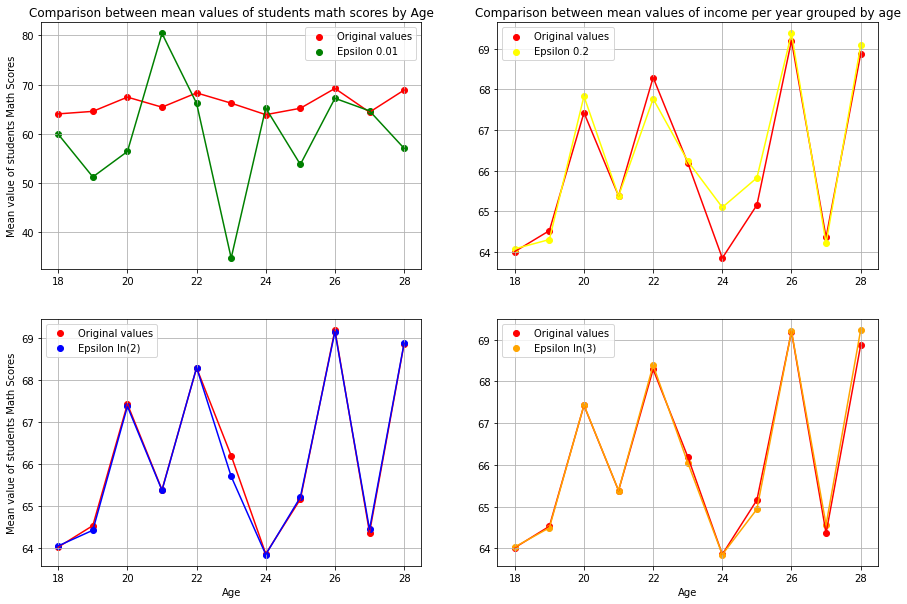

In [117]:
att = 'math score'

plotDatas = {'original': datasetAvgAge[att],'0.01': datasetAvgAge0_0_1[att],
                '0.2':datasetAvgAge0_2[att],'ln(2)':datasetAvgAgeln_2[att],'ln(3)':datasetAvgAgeln_3[att]}

yLabel = "Mean value of students Math Scores"
title = "Comparison between mean values of students math scores by " + group

plotGroupAnalysis(title,xLabel,yLabel,x, plotDatas)


<Figure size 432x288 with 0 Axes>

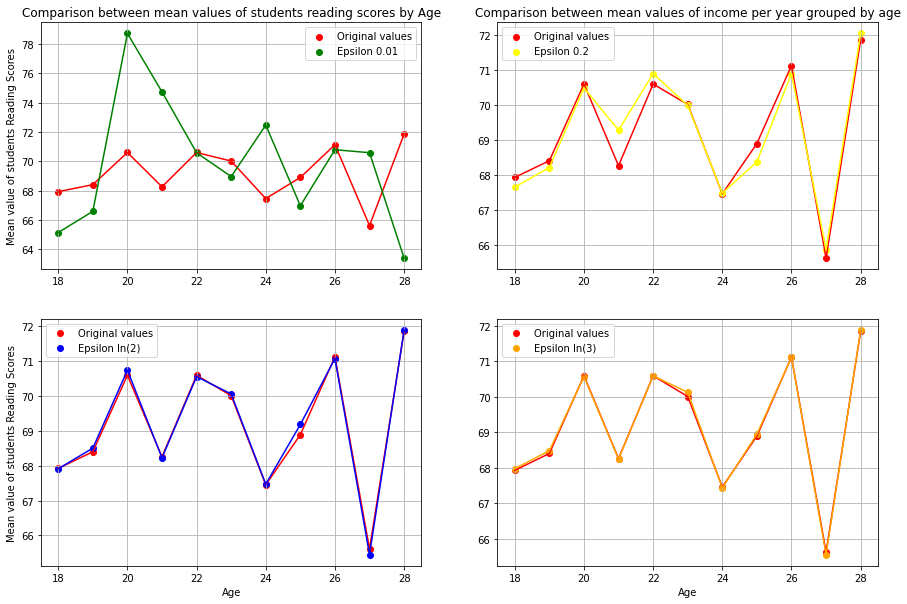

In [118]:
att = 'reading score'

plotDatas = {'original': datasetAvgAge[att],'0.01': datasetAvgAge0_0_1[att],
                '0.2':datasetAvgAge0_2[att],'ln(2)':datasetAvgAgeln_2[att],'ln(3)':datasetAvgAgeln_3[att]}

yLabel = "Mean value of students Reading Scores"
title = "Comparison between mean values of students reading scores by " + group

plotGroupAnalysis(title,xLabel,yLabel,x, plotDatas)

<Figure size 432x288 with 0 Axes>

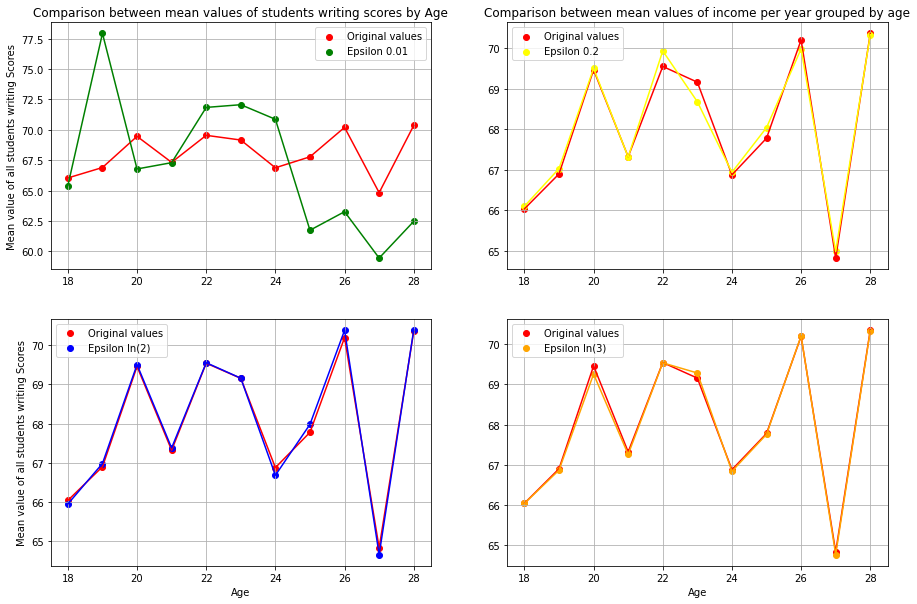

In [119]:
att = 'writing score'

plotDatas = {'original': datasetAvgAge[att],'0.01': datasetAvgAge0_0_1[att],
                '0.2':datasetAvgAge0_2[att],'ln(2)':datasetAvgAgeln_2[att],'ln(3)':datasetAvgAgeln_3[att]}

yLabel = "Mean value of all students writing Scores"
title = "Comparison between mean values of students writing scores by " + group

plotGroupAnalysis(title,xLabel,yLabel,x, plotDatas)

In [120]:
group = 'ethnicity'
xLabel = group
x = np.sort(dataset[group].unique())
datasetAvgAge,datasetAvgAge0_0_1,datasetAvgAge0_2,datasetAvgAgeln_2,datasetAvgAgeln_3 = groupDiffPriv(group,'avg')

           math score  reading score  writing score
ethnicity                                          
group A     50.771890      75.125912      49.637787
group B     46.568369      70.905110      61.290531
group C     61.257505      75.383990      76.850902
group D     81.607199      69.918932      76.607157
group E     63.100410      81.112639      72.928894


<Figure size 432x288 with 0 Axes>

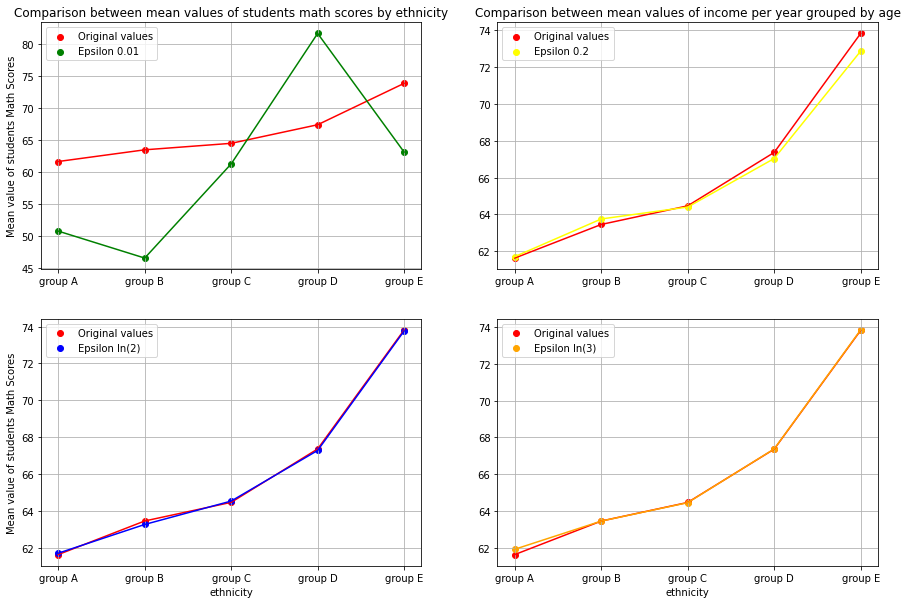

In [121]:
att = 'math score'

plotDatas = {'original': datasetAvgAge[att],'0.01': datasetAvgAge0_0_1[att],
                '0.2':datasetAvgAge0_2[att],'ln(2)':datasetAvgAgeln_2[att],'ln(3)':datasetAvgAgeln_3[att]}

yLabel = "Mean value of students Math Scores"
title = "Comparison between mean values of students math scores by " + group

plotGroupAnalysis(title,xLabel,yLabel,x, plotDatas)

<Figure size 432x288 with 0 Axes>

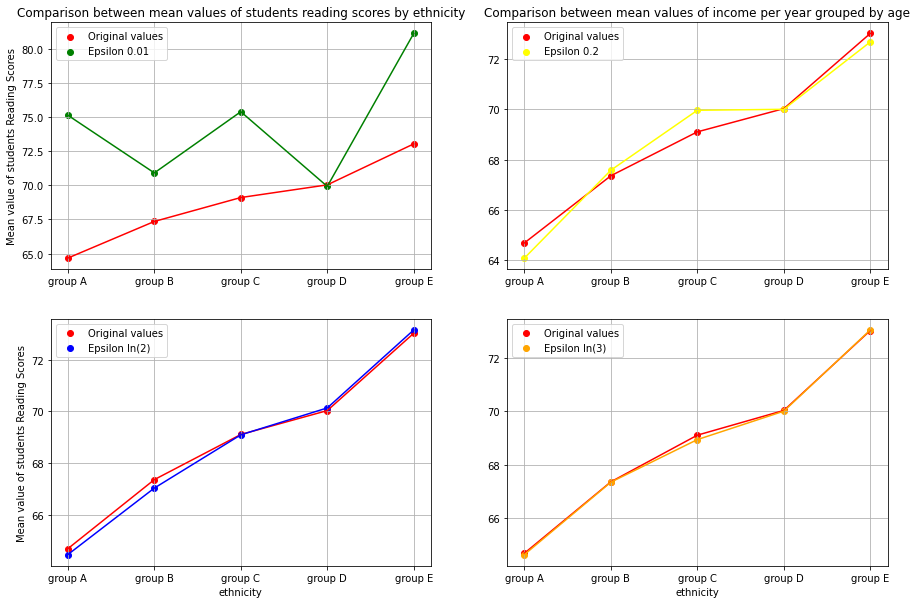

In [122]:
att = 'reading score'

plotDatas = {'original': datasetAvgAge[att],'0.01': datasetAvgAge0_0_1[att],
                '0.2':datasetAvgAge0_2[att],'ln(2)':datasetAvgAgeln_2[att],'ln(3)':datasetAvgAgeln_3[att]}

yLabel = "Mean value of students Reading Scores"
title = "Comparison between mean values of students reading scores by " + group

plotGroupAnalysis(title,xLabel,yLabel,x, plotDatas)

<Figure size 432x288 with 0 Axes>

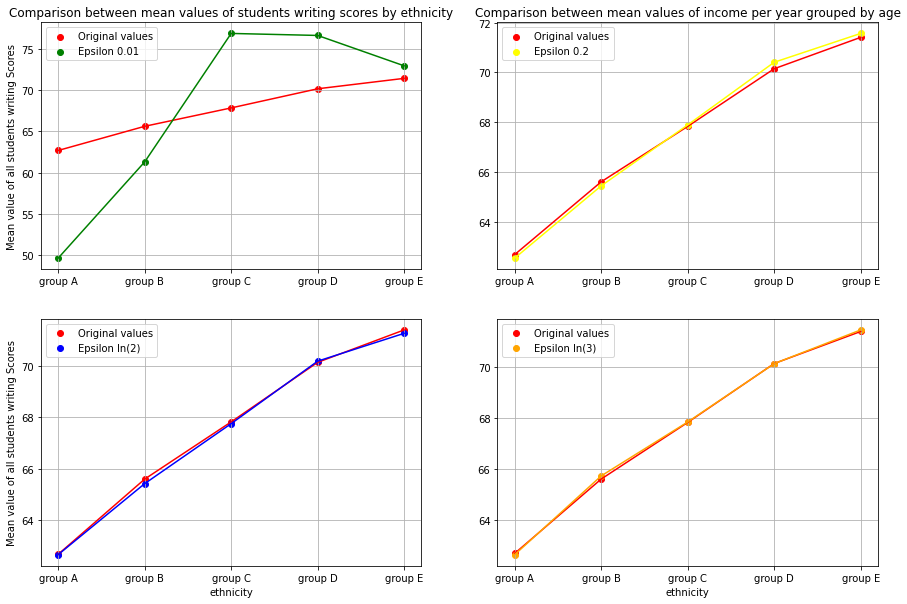

In [123]:
att = 'writing score'

plotDatas = {'original': datasetAvgAge[att],'0.01': datasetAvgAge0_0_1[att],
                '0.2':datasetAvgAge0_2[att],'ln(2)':datasetAvgAgeln_2[att],'ln(3)':datasetAvgAgeln_3[att]}

yLabel = "Mean value of all students writing Scores"
title = "Comparison between mean values of students writing scores by " + group

plotGroupAnalysis(title,xLabel,yLabel,x, plotDatas)

In [124]:
group = 'parental education'
xLabel = group
x = np.sort(dataset[group].unique())
datasetAvgAge,datasetAvgAge0_0_1,datasetAvgAge0_2,datasetAvgAgeln_2,datasetAvgAgeln_3 = groupDiffPriv(group,'avg')

                    math score  reading score  writing score
parental education                                          
associate's degree   77.292342      72.519611      74.401615
bachelor's degree    68.260797      70.407114      78.835584
high school          76.053367      65.023026      70.999102
master's degree      77.424169      74.260853      84.640865
some college         66.997444      66.954316      89.290419
some high school     58.629914      68.654822      62.729454


<Figure size 432x288 with 0 Axes>

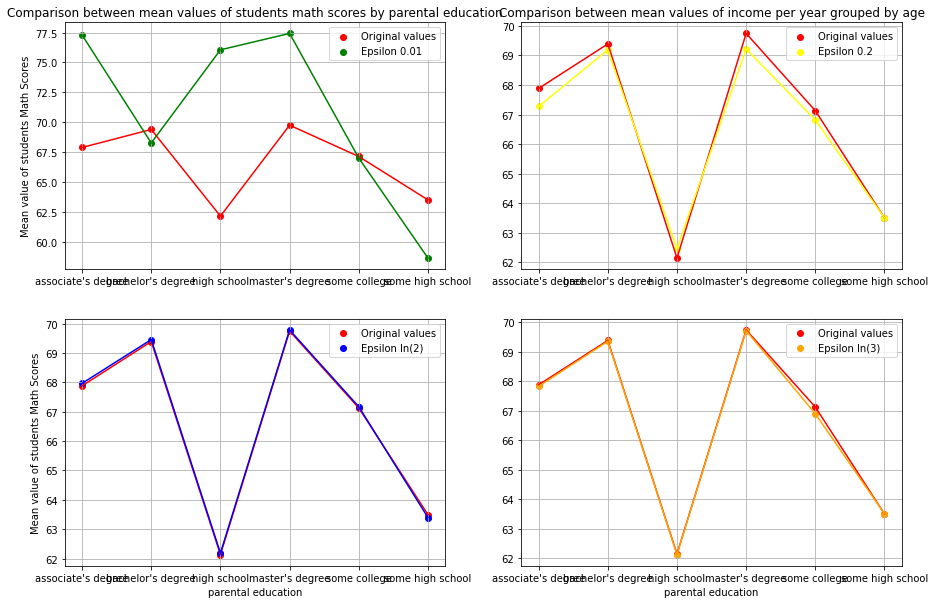

In [125]:
att = 'math score'

plotDatas = {'original': datasetAvgAge[att],'0.01': datasetAvgAge0_0_1[att],
                '0.2':datasetAvgAge0_2[att],'ln(2)':datasetAvgAgeln_2[att],'ln(3)':datasetAvgAgeln_3[att]}

yLabel = "Mean value of students Math Scores"
title = "Comparison between mean values of students math scores by " + group

plotGroupAnalysis(title,xLabel,yLabel,x, plotDatas)

<Figure size 432x288 with 0 Axes>

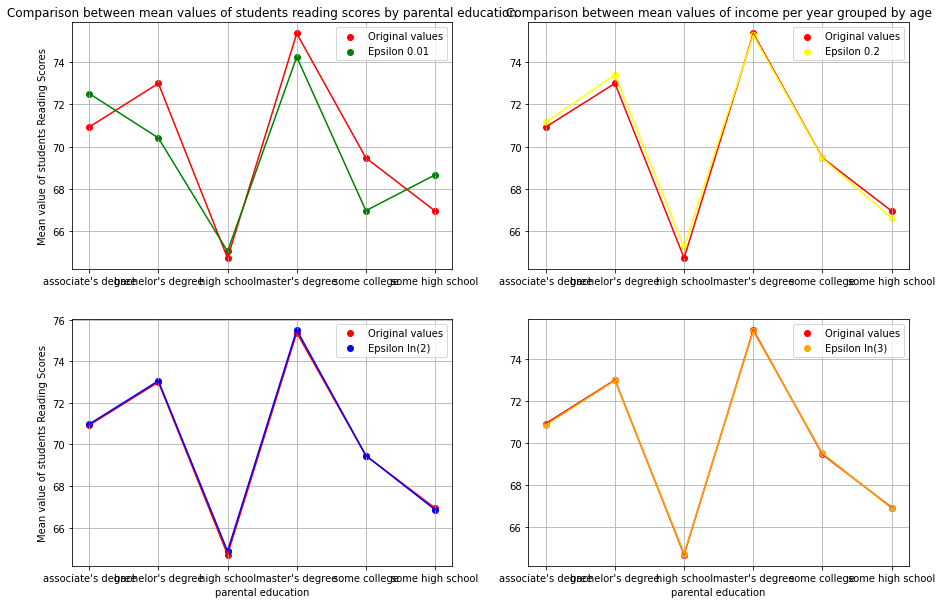

In [126]:
att = 'reading score'

plotDatas = {'original': datasetAvgAge[att],'0.01': datasetAvgAge0_0_1[att],
                '0.2':datasetAvgAge0_2[att],'ln(2)':datasetAvgAgeln_2[att],'ln(3)':datasetAvgAgeln_3[att]}

yLabel = "Mean value of students Reading Scores"
title = "Comparison between mean values of students reading scores by " + group

plotGroupAnalysis(title,xLabel,yLabel,x, plotDatas)

<Figure size 432x288 with 0 Axes>

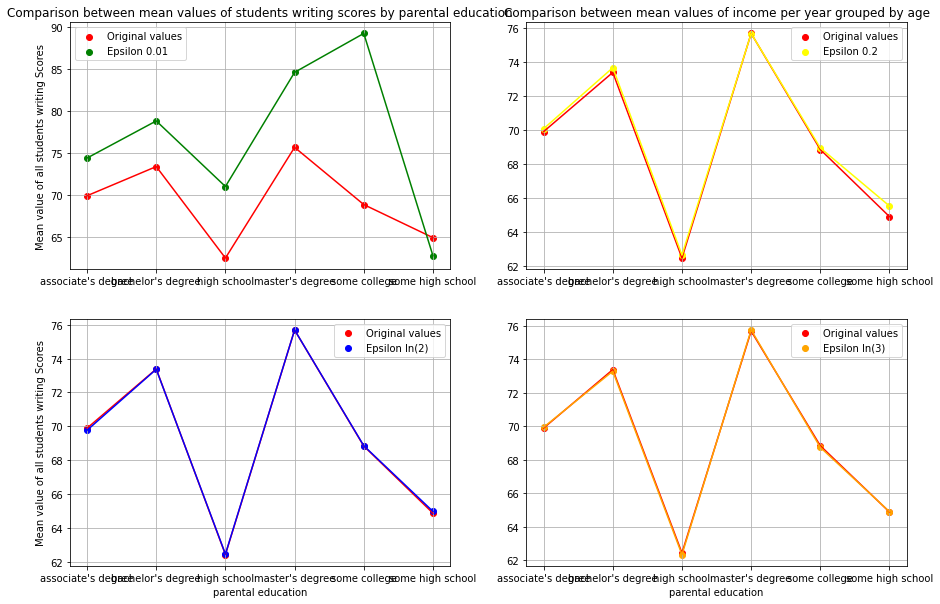

In [127]:
att = 'writing score'

plotDatas = {'original': datasetAvgAge[att],'0.01': datasetAvgAge0_0_1[att],
                '0.2':datasetAvgAge0_2[att],'ln(2)':datasetAvgAgeln_2[att],'ln(3)':datasetAvgAgeln_3[att]}

yLabel = "Mean value of all students writing Scores"
title = "Comparison between mean values of students writing scores by " + group

plotGroupAnalysis(title,xLabel,yLabel,x, plotDatas)

EXERCISE 2.5 - Discuss advantages and disadvantages.